In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('Dataset/diabetes2.csv')

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
# Define params to pruning the tree
param_grid = {
    'max_depth': [2, 4, 6, 8],
    'max_leaf_nodes': [4, 6],
    'min_samples_leaf': [2, 4, 6, 8, 10],
 }

In [5]:
# Create model
X = df[[ 'BMI', 'Glucose']].values
y = df['Outcome'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

# Generate random data to test model
rand = []
for i in range(5):
    rand.append([random.randint(0,100) for i in range(len(X[0]))])

def dec_tree(classifier, random_data=rand):
    
    # Fitting model
    model = DecisionTreeClassifier(criterion=classifier)
    model.fit(X_train, y_train)

    # Display results
    print(f"Random datasets: {rand[:]}" )
    print(f"Classifications: {model.predict(random_data)}\n")
    
    # Eval
    gs = GridSearchCV(model, param_grid, scoring='f1', cv=5)
    gs.fit(X, y)
    print(f"\nParams: {gs.best_params_}")
    print(f"best score: {gs.best_score_}\n------\n")
    model = DecisionTreeClassifier(criterion=classifier,
                                  max_depth=gs.best_params_['max_depth'],
                                  max_leaf_nodes=gs.best_params_['max_leaf_nodes'],
                                  min_samples_leaf=gs.best_params_['min_samples_leaf'])
    model.fit(X_train, y_train)
    
    # Plot
    plot_tree(
        model,
        class_names=['BloodPressure', 'BMI', 'Glucose'],
        filled = True,
    )

Random datasets: [[51, 0], [61, 92], [2, 44], [90, 99], [75, 54]]
Classifications: [1 1 0 1 1]


Params: {'max_depth': 4, 'max_leaf_nodes': 6, 'min_samples_leaf': 2}
best score: 0.5611064260068656
------



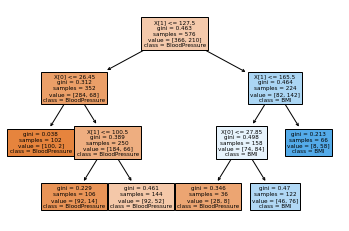

In [6]:
dec_tree('gini')

Random datasets: [[51, 0], [61, 92], [2, 44], [90, 99], [75, 54]]
Classifications: [1 1 0 1 1]


Params: {'max_depth': 4, 'max_leaf_nodes': 6, 'min_samples_leaf': 2}
best score: 0.5819747704442281
------



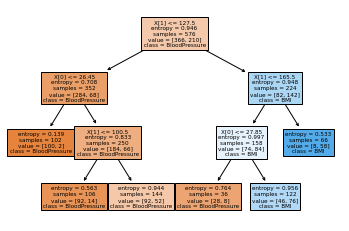

In [7]:
dec_tree('entropy')

In [8]:
# RandomForestClassifier

# Prepare data
X = df[['Pregnancies', 'BMI', 'Glucose']].values
y = df['Outcome'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)
def rand_forest(criterion='gini'):
    
    # Fitting model
    rf = RandomForestClassifier(criterion=criterion)
    rf.fit(X_train, y_train)

    # Make estimators list
    n_estimators = list(range(1, 101))
    param_grid = {
     'n_estimators': n_estimators,
    }

    # Checking model
    first_row = X_test[0]
    print("prediction:", rf.predict([first_row]))
    print("true value:", y_test[0])

    # Fixing params
    gs = GridSearchCV(rf, param_grid, cv=5)
    gs.fit(X, y)

    scores = gs.cv_results_['mean_test_score']
    print("best params:", gs.best_params_)

    # Fill model with the best estimators amout 
    rf = RandomForestClassifier(n_estimators=gs.best_params_['n_estimators'])
    rf.fit(X_train, y_train)
    
    # Plotting results
    scores = gs.cv_results_['mean_test_score']
    plt.plot(n_estimators, scores)
    plt.xlabel("n_estimators")
    plt.ylabel("accuracy")
    plt.xlim(0, 100)
    
    # Get significant features
    ft_imp = pd.Series(rf.feature_importances_,
    index=['Pregnancies', 'BMI', 'Glucose']).sort_values(ascending=False)
    print(ft_imp)

prediction: [0]
true value: 0
best params: {'n_estimators': 87}
Glucose        0.461319
BMI            0.369657
Pregnancies    0.169024
dtype: float64


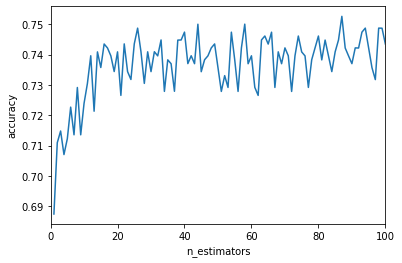

In [9]:
rand_forest('gini')

prediction: [0]
true value: 0
best params: {'n_estimators': 98}
Glucose        0.453416
BMI            0.381410
Pregnancies    0.165174
dtype: float64


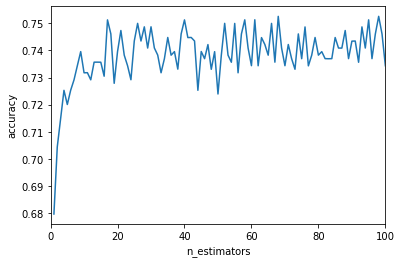

In [10]:
rand_forest('entropy')